In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import torch

In [36]:
from scipy.stats import gaussian_kde
from scipy.integrate import simpson

In [42]:
heatflux_data = torch.load('heatfluxes.pt', weights_only=False)

In [43]:
heat_flux_sim = heatflux_data['sim_hf'].numpy()
heat_flux_model = heatflux_data['model_hf'].numpy()

In [44]:
# Estimate PDFs using KDE
kde_sim = gaussian_kde(heat_flux_sim)
kde_model  = gaussian_kde(heat_flux_model)
# Create a range of x values covering both datasets
x_vals = np.linspace(min(heat_flux_sim.min(), heat_flux_model.min()),
                     max(heat_flux_sim.max(), heat_flux_model.max()), 1000)

pdf_sim = kde_sim(x_vals)
pdf_model  = kde_model(x_vals)

# Avoid division by zero by adding a small epsilon
epsilon = 1e-10
pdf_model = np.where(pdf_model == 0, epsilon, pdf_model)

# Compute the integrand: P(x) * log(P(x)/Q(x))
integrand = pdf_sim * np.log(pdf_sim / pdf_model)

# Use Simpson's rule to integrate over x_vals
kl_div_continuous = simpson(integrand, x_vals)
print("KL divergence (KDE-based):", kl_div_continuous)

KL divergence (KDE-based): 0.20160638788209154


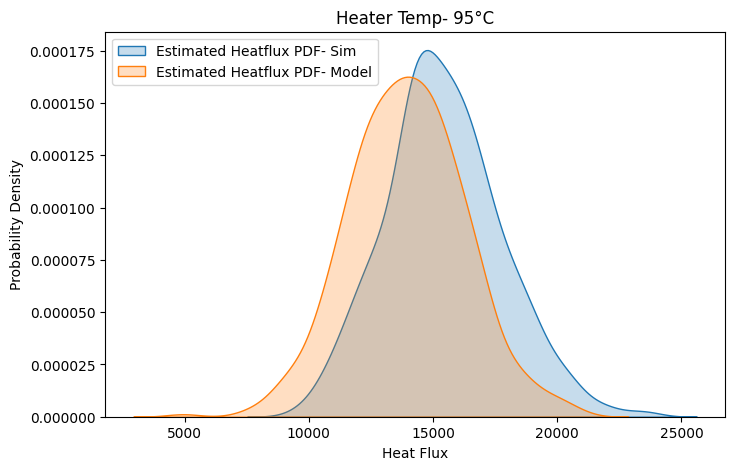

In [46]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.kdeplot(heat_flux_sim, fill=True, label='Estimated Heatflux PDF- Sim')
sns.kdeplot(heat_flux_model, fill=True, label='Estimated Heatflux PDF- Model')
plt.xlabel('Heat Flux')
plt.ylabel('Probability Density')
plt.title('Heater Temp- 95°C')
plt.legend()
plt.show()